<a href="https://colab.research.google.com/github/itishavamja/Flightdata_Analysis/blob/main/FlightData(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler # Make sure StandardScaler is imported
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE  # Handle class imbalance


In [2]:
# load the dataset
Flight_data=pd.read_csv("flight.csv")

In [3]:
print(Flight_data)

       QUARTER  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID ORIGIN  \
0            1              12892                1289208    LAX   
1            1              13244                1324402    MEM   
2            1              12892                1289208    LAX   
3            1              13244                1324402    MEM   
4            1              12892                1289208    LAX   
...        ...                ...                    ...    ...   
41529        1              13930                1393007    ORD   
41530        1              14027                1402702    PBI   
41531        1              13930                1393007    ORD   
41532        1              14027                1402702    PBI   
41533        1              13930                1393007    ORD   

      ORIGIN_COUNTRY ORIGIN_STATE_ABR ORIGIN_STATE_NM  ORIGIN_WAC DEST  \
0                 US               CA      California          91  MEM   
1                 US               TN       Ten

In [4]:
Flight_data.head(20)

,QUARTER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_WAC,DEST,DEST_COUNTRY,...,AIRPORT_GROUP,TK_CARRIER_GROUP,OP_CARRIER_CHANGE,TICKET_CARRIER,PASSENGERS,MARKET_FARE,MARKET_DISTANCE,MARKET_MILES_FLOWN,ITIN_GEO_TYPE,MKT_GEO_TYPE
0,1,12892,1289208,LAX,US,CA,California,91,MEM,US,...,LAX:PHX:MEM,AA:AA,0.0,AA,1.0,135.67,1634.0,1634.0,2.0,2.0
1,1,13244,1324402,MEM,US,TN,Tennessee,54,LAX,US,...,MEM:DFW:LAX,AA:AA,0.0,AA,1.0,138.33,1666.0,1666.0,2.0,2.0
2,1,12892,1289208,LAX,US,CA,California,91,MEM,US,...,LAX:PHX:MEM,AA:AA,0.0,AA,1.0,146.56,1634.0,1634.0,2.0,2.0
3,1,13244,1324402,MEM,US,TN,Tennessee,54,LAX,US,...,MEM:DFW:LAX,AA:AA,0.0,AA,1.0,149.44,1666.0,1666.0,2.0,2.0
4,1,12892,1289208,LAX,US,CA,California,91,MEM,US,...,LAX:PHX:MEM,AA:AA,0.0,AA,1.0,161.91,1634.0,1634.0,2.0,2.0
5,1,13244,1324402,MEM,US,TN,Tennessee,54,LAX,US,...,MEM:DFW:LAX,AA:AA,0.0,AA,1.0,165.09,1666.0,1666.0,2.0,2.0
6,1,12892,1289208,LAX,US,CA,California,91,MEM,US,...,LAX:PHX:MEM,AA:AA,1.0,AA,1.0,171.32,1634.0,1634.0,2.0,2.0
7,1,13244,1324402,MEM,US,TN,Tennessee,54,LAX,US,...,MEM:DFW:LAX,AA:AA,0.0,AA,1.0,174.68,1666.0,1666.0,2.0,2.0
8,1,12892,1289208,LAX,US,CA,California,91,MEM,US,...,LAX:PHX:MEM,AA:AA,0.0,AA,1.0,181.23,1634.0,1634.0,2.0,2.0
9,1,13244,1324402,MEM,US,TN,Tennessee,54,LAX,US,...,MEM:DFW:LAX,AA:AA,0.0,AA,1.0,184.77,1666.0,1666.0,2.0,2.0


In [5]:
Flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41534 entries, 0 to 41533
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   QUARTER                41534 non-null  int64  
 1   ORIGIN_AIRPORT_ID      41534 non-null  int64  
 2   ORIGIN_AIRPORT_SEQ_ID  41534 non-null  int64  
 3   ORIGIN                 41534 non-null  object 
 4   ORIGIN_COUNTRY         41534 non-null  object 
 5   ORIGIN_STATE_ABR       41534 non-null  object 
 6   ORIGIN_STATE_NM        41534 non-null  object 
 7   ORIGIN_WAC             41534 non-null  int64  
 8   DEST                   41534 non-null  object 
 9   DEST_COUNTRY           41534 non-null  object 
 10  DEST_STATE_ABR         41534 non-null  object 
 11  DEST_STATE_NM          41534 non-null  object 
 12  DEST_WAC               41534 non-null  int64  
 13  AIRPORT_GROUP          41534 non-null  object 
 14  TK_CARRIER_GROUP       41533 non-null  object 
 15  OP

In [6]:
print(Flight_data.columns)

Index(['QUARTER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ORIGIN_WAC',
       'DEST', 'DEST_COUNTRY', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRPORT_GROUP', 'TK_CARRIER_GROUP', 'OP_CARRIER_CHANGE',
       'TICKET_CARRIER', 'PASSENGERS', 'MARKET_FARE', 'MARKET_DISTANCE',
       'MARKET_MILES_FLOWN', 'ITIN_GEO_TYPE', 'MKT_GEO_TYPE'],
      dtype='object')


In [7]:
# statical
Flight_data.describe()

,QUARTER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_WAC,DEST_WAC,OP_CARRIER_CHANGE,PASSENGERS,MARKET_FARE,MARKET_DISTANCE,MARKET_MILES_FLOWN,ITIN_GEO_TYPE,MKT_GEO_TYPE
count,41534.0,41534.000000,4.153400e+04,41534.000000,41534.000000,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000
mean,1.0,13285.472890,1.328551e+06,46.647132,51.186257,0.212193,2.054198,275.310874,1486.406207,1482.959911,1.921003,1.921340
std,0.0,812.595319,8.125954e+04,24.654053,25.479175,0.408865,5.091504,354.652013,956.454944,955.397310,0.269738,0.269211
min,1.0,10135.000000,1.013506e+06,1.000000,1.000000,0.000000,1.000000,0.000000,109.000000,0.000000,1.000000,1.000000
25%,1.0,13204.000000,1.320402e+06,33.000000,33.000000,0.000000,1.000000,142.000000,861.000000,849.000000,2.000000,2.000000
50%,1.0,13303.000000,1.330303e+06,33.000000,41.000000,0.000000,1.000000,214.830000,1145.000000,1145.000000,2.000000,2.000000
75%,1.0,13830.000000,1.383002e+06,73.000000,74.000000,0.000000,1.000000,322.000000,1978.000000,1972.000000,2.000000,2.000000
max,1.0,16218.000000,1.621802e+06,93.000000,93.000000,1.000000,318.000000,35106.950000,7080.000000,7080.000000,2.000000,2.000000


In [8]:
# Step 2: Preprocess Data

# 1.Check Missing Values Before Cleaning
print("Missing Values Before Cleaning:\n", Flight_data.isnull().sum())
# 2. Handle Missing Values
Flight_data.fillna({
    "MARKET_FARE": Flight_data["MARKET_FARE"].median(),  # Fill missing fares with median
    "MARKET_DISTANCE": Flight_data["MARKET_DISTANCE"].median(),  # Fill missing distances with median
    "PASSENGERS": Flight_data["PASSENGERS"].fillna(0),  # Fill missing passenger values with 0
}, inplace=True)

# Drop rows where critical values are missing

Flight_data.dropna(subset=["ORIGIN", "DEST", "TICKET_CARRIER"], inplace=True)

# 3. Check Missing Values After Cleaning
print("\nMissing Values After Cleaning:\n", Flight_data.isnull().sum())

Missing Values Before Cleaning:
 QUARTER                  0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
ORIGIN_COUNTRY           0
ORIGIN_STATE_ABR         0
ORIGIN_STATE_NM          0
ORIGIN_WAC               0
DEST                     0
DEST_COUNTRY             0
DEST_STATE_ABR           0
DEST_STATE_NM            0
DEST_WAC                 0
AIRPORT_GROUP            0
TK_CARRIER_GROUP         1
OP_CARRIER_CHANGE        1
TICKET_CARRIER           1
PASSENGERS               1
MARKET_FARE              1
MARKET_DISTANCE          1
MARKET_MILES_FLOWN       1
ITIN_GEO_TYPE            1
MKT_GEO_TYPE             1
dtype: int64

Missing Values After Cleaning:
 QUARTER                  0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
ORIGIN_COUNTRY           0
ORIGIN_STATE_ABR         0
ORIGIN_STATE_NM          0
ORIGIN_WAC               0
DEST                     0
DEST_COUNTRY             0
DEST_STATE_ABR           0
DES

In [9]:
#3.Features Engineering
# Create Binary Target Variables

# Long Flight (1) vs. Short Flight (0)
Flight_data["Long_Flight"] = Flight_data["MARKET_DISTANCE"].apply(lambda x: 1 if x > 800 else 0)

# High Traffic Flight (1) vs. Low Traffic Flight (0)
# Flight_data["High_Traffic"] = Flight_data["PASSENGERS"].apply(lambda x: 1 if x > 20 else 0)

# Display new features
print(Flight_data[["MARKET_DISTANCE", "Long_Flight", ]].head())

   MARKET_DISTANCE  Long_Flight
0           1634.0            1
1           1666.0            1
2           1634.0            1
3           1666.0            1
4           1634.0            1


In [10]:
# Step 4: Split Data for Model Training
# Define features
features = ["MARKET_DISTANCE", "MARKET_FARE", "PASSENGERS", "ORIGIN", "DEST", "TICKET_CARRIER"]

# Separate target variable
y = Flight_data["Long_Flight"].copy()
X = Flight_data[features].copy() # Only include selected features

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale only numeric features AFTER train-test split
scaler = StandardScaler()
X_train[["MARKET_DISTANCE", "MARKET_FARE", "PASSENGERS"]] = scaler.fit_transform(X_train[["MARKET_DISTANCE", "MARKET_FARE", "PASSENGERS"]])
X_test[["MARKET_DISTANCE", "MARKET_FARE", "PASSENGERS"]] = scaler.transform(X_test[["MARKET_DISTANCE", "MARKET_FARE", "PASSENGERS"]])

# One-hot encode categorical features
categorical_features = ["ORIGIN", "DEST", "TICKET_CARRIER"]
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Align columns (handle categorical feature mismatch)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [11]:
# #  Step 5: Model Selection & Training (Regression Model)
# Train Logistic Regression Model with Class Balancing
# logistic_model = LogisticRegression(C=0.1, class_weight="balanced", random_state=42)
logistic_model=LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

#  Model Predictions
y_pred = logistic_model.predict(X_test)

#  Model Evaluation
train_accuracy_logistic = accuracy_score(y_train, logistic_model.predict(X_train))
test_accuracy_logistic = accuracy_score(y_test, y_pred)

print(f"Logistic Regression - Training Accuracy: {train_accuracy_logistic:.2f}")
print(f"Logistic Regression - Testing Accuracy: {test_accuracy_logistic:.2f}")
# print("\n Model Performance:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - Training Accuracy: 1.00
Logistic Regression - Testing Accuracy: 1.00


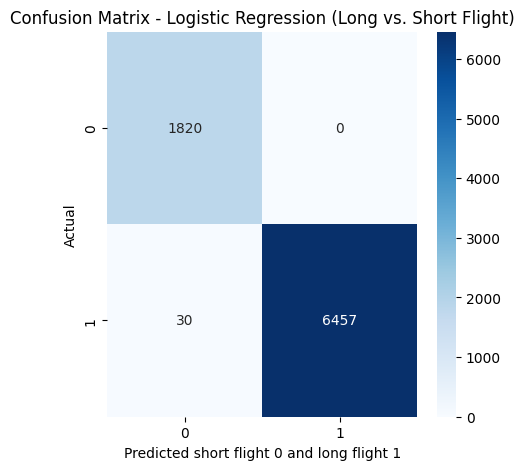

In [12]:
#  Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted short flight 0 and long flight 1")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Long vs. Short Flight)")
plt.show()


# Cross-Validation Score (To Check Overfitting)
# cv_scores = cross_val_score(logistic_model, X, y, cv=5, scoring="accuracy")
# print(f"Cross-validation Accuracy: {cv_scores.mean():.2f}")

In [ ]:
# Plot bar chart
avg_fare_by_distance = Flight_data.groupby("Long_Flight")["MARKET_FARE"].mean()

plt.figure(figsize=(6, 4))
avg_fare_by_distance.plot(kind="bar", color=["blue", "red"])

# Labels and title
plt.xlabel("Flight Type (0: Short, 1: Long)")
plt.ylabel("Average Market Fare ($)")
plt.title("Average Market Fare for Long vs. Short Flights")
plt.xticks(ticks=[0, 1], labels=["Short Flight", "Long Flight"], rotation=0)

# Show the chart
plt.show()